
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>
    Niloufar Abbasi

____

# Emotion Recognition with Recurrent Neural Networks


---

## **Introduction**

In this task, you will implement a Recurrent Neural Network (RNN) to perform tweet emotion recognition. The goal is to classify tweets into one of six basic emotions:
- **0: sadness**
- **1: joy**
- **2: love**
- **3: anger**
- **4: fear**
- **5: surprise**

We will be using a dataset of tweets, where each tweet has been labeled with one of these emotions. Throughout this notebook, you will follow step-by-step instructions to build and train your model. As you progress, you'll complete the provided TODO sections by filling in the necessary code and functions.

By the end of this exercise, you will:
- Understand how to preprocess text data for use in RNN models.
- Build and train a model using Pytorch.
- Evaluate the performance of your model on the test set.

---


---

## Task 1: Enter Your Information

Before we begin, please enter your **student ID** and **name** in the code section below.

Make sure to replace the placeholders with your actual information.

---

In [44]:
#########################################
# TODO: Enter your personal information #
#########################################

student_name = "Seyed Mohammad Ojagh Kazzazi"  # Replace with your name


student_id   = 400100554  # Replace with your student ID

print("Your name:", student_name)
print("Your student ID:", student_id)

Your name: Seyed Mohammad Ojagh Kazzazi
Your student ID: 400100554


---

## Task 2: Setup and Imports

In this task, we'll be preparing our environment by importing the necessary libraries. Please run the cells below to set everything up. If any library is missing on your end, make sure to install it.

### Instructions:
1. **Run the cells** to install any required packages and import the necessary libraries.
2. If any library is not installed in your environment, use `!pip install <library_name>` to install it.
---

In [45]:
!pip install datasets

Required Libraries:

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datasets import load_dataset

%matplotlib inline

#####################################################################
# TODO: Add any additional libraries you may need for your analysis #
#####################################################################

# You can add your libraries here

In [47]:
# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device set to: {device}")


Device set to: cuda


### Additional Functions

The following functions have been provided to help you visualize the results of your model training. These will allow you to analyze both the model's performance over time (through the training history) and how well it performs on individual predictions (through a confusion matrix).

1. **`plot_history(hist)`**: This function takes the training history object (`hist`) from your model and plots both the accuracy and loss over the number of epochs for both training and validation sets. It provides an easy way to visually track the model's learning progress and performance.

2. **`visualize_confusion_matrix(actual_labels, predicted_labels, classes)`**: After making predictions with your model, you can use this function to plot a confusion matrix. It shows the accuracy of your model across each class, helping to identify areas where the model is performing well and where it might be struggling. The matrix is normalized to make comparisons easier.

These functions are for your convenience, you can directly use them after running your model to visualize the results.


In [48]:
def plot_history(hist):
    # Extract metrics from the dictionary
    epochs = len(hist['loss'])

    plt.figure(figsize=(16, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), hist['accuracy'], label='Training Accuracy')
    plt.plot(range(1, epochs + 1), hist['val_accuracy'], label='Validation Accuracy')
    plt.ylim([0.0, 1.0])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), hist['loss'], label='Training Loss')
    plt.plot(range(1, epochs + 1), hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

def visualize_confusion_matrix(actual_labels, predicted_labels, classes):

    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


---

## Task 3: Importing Data

In this task, we will

- import the Tweet Emotion dataset

- create training, validation, and test sets
    
- extract the tweets and their corresponding labels for further analysis

---

In [49]:
dataset = load_dataset('emotion')
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [50]:
# Display the first few samples
print(dataset['train'][0:5])  # Adjust 'train' to 'test' or other splits if necessary

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [51]:
# Split the dataset into training, validation, and test sets
training = dataset['train']
validation = dataset['validation']
test = dataset['test']

print(f"Training samples: {len(training)}")
print(f"Validation samples: {len(validation)}")
print(f"Test samples: {len(test)}")


Training samples: 16000
Validation samples: 2000
Test samples: 2000


In [52]:
########################################################################################################
# TODO:                                                                                                #
# Implement the `extract_tweets_labels` function to iterate over the provided dataset.                 #
# Within this function, extract the tweet text and their corresponding labels into two separate lists. #
# Then, call this function with the training dataset to obtain the tweets and labels,                  #
# ensuring proper data handling for subsequent analysis.                                               #
########################################################################################################

def extract_tweets_labels(data):
    # Extract the text and labels from the dataset
    tweets = [item['text'] for item in data]
    labels = [item['label'] for item in data]
    return tweets, labels

# Get the tweets and labels from the training set
tweets, labels = extract_tweets_labels(training)

# Display the first tweet and its label
print(f"First Tweet: {tweets[0]}")
print(f"First Label: {labels[0]}")


First Tweet: i didnt feel humiliated
First Label: 0


---

## Task 4: Tokenization of Tweets

In this section, we will focus on the tokenization of the tweets in the dataset. Tokenization is a crucial step in natural language processing (NLP) that involves breaking down text into smaller units, such as words or subwords. This process enables the model to better understand and analyze the text data.

### Objectives:
1. Implement a tokenizer to convert the tweet texts into tokens.
2. Ensure the tokenization process handles various aspects of the text, such as punctuation and special characters.

By the end of this task, you will have a set of tokenized tweets ready for further processing in your NLP pipeline.

---

In [53]:
import nltk
from nltk.tokenize import word_tokenize

# Download tokenizer if not already available
nltk.download('punkt')
# Download the 'punkt_tab' data
nltk.download('punkt_tab')

###############################################################################################################################################
# TODO: Tokenization of Tweets                                                                                                                #
# 1. Select a Tokenization Method: Choose a suitable tokenization method to preprocess the tweets.                                            #
# Ensure that the tokenization handles special characters and maintains the integrity of the text data.                                       #
# 2. Implement the Tokenizer: Once you have selected a method, implement the tokenizer to convert the tweet texts into sequences of tokens.   #
# 3. Test the Tokenization:                                                                                                                   #
# Verify the functionality of your tokenizer by applying it to a sample tweet from the dataset and displaying the resulting tokenized output. #
###############################################################################################################################################

# Define the tokenizer function
def tokenizer(text):
    return word_tokenize(text)

# Test the tokenizer with a sample tweet
sample_tweet = tweets[0]
tokenized_tweet = tokenizer(sample_tweet)

# Display the original and tokenized tweet
print(f"Original Tweet: {sample_tweet}")
print(f"Tokenized Tweet: {tokenized_tweet}")

Original Tweet: i didnt feel humiliated
Tokenized Tweet: ['i', 'didnt', 'feel', 'humiliated']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


---

## Task 5: Padding and Truncating Sequences

In this task, we will prepare the tokenized tweets for model training by checking their lengths and creating padded sequences.

1. **Checking the Length of the Tweets**
   - Analyze the distribution of tweet lengths to understand the range of token counts in the dataset.

2. **Creating Padded Sequences**
   - After tokenizing the tweets, sequences of different lengths must be adjusted to a uniform length to facilitate training.

---


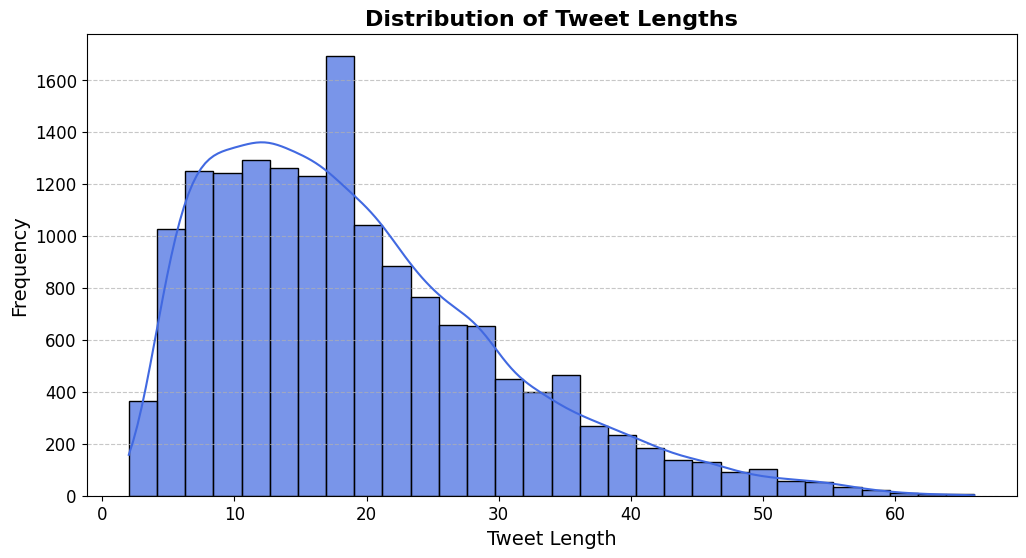

Selected Maximum Length for Padding/Truncation: 35


In [54]:
import seaborn as sns

# Calculate the lengths of the tokenized tweets
tweet_lengths = [len(tokenizer(tweet)) for tweet in tweets]

# Visualize the distribution of tweet lengths using a beautiful histogram
plt.figure(figsize=(12, 6))
sns.histplot(tweet_lengths, bins=30, kde=True, color='royalblue', alpha=0.7)
plt.title('Distribution of Tweet Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Determine a suitable maximum length (e.g., 90th percentile)
max_length = int(np.percentile(tweet_lengths, 90))
print(f"Selected Maximum Length for Padding/Truncation: {max_length}")


In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer_obj = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer_obj.fit_on_texts(tweets)

def get_sequences(tokenizer_obj, tweets, max_length):
    # Convert text to sequences of integers
    sequences = tokenizer_obj.texts_to_sequences(tweets)
    # Pad or truncate sequences to the maximum length
    padded_sequences = pad_sequences(
        sequences,
        maxlen=max_length,
        padding='post',  # Add padding at the end
        truncating='post'  # Truncate from the end
    )
    return padded_sequences

# Apply the function to the training tweets
padded_train_sequences = get_sequences(tokenizer_obj, tweets, max_length)
print(f"Padded Sequence (First Example): {padded_train_sequences[0]}")


Padded Sequence (First Example): [  2 139   3 679   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


---

## Task 6: Analyzing Label Distribution

1. Checking the distribution of labels.
2. Addressing any class imbalance using appropriate techniques.

Note:

(**Providing a clear explanation of the chosen method to address the imbalance and how it will improve the model’s performance is critical.** Without handling class imbalance properly, the model could achieve a high accuracy by focusing on the majority class, but it may perform poorly on the minority class, which would result in misleading metrics and reduced generalization.

Hence, it is important to not only implement an appropriate solution but also **justify** why the selected approach is effective for the given task.)

---

<ipython-input-56-ca8b692f51a1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")


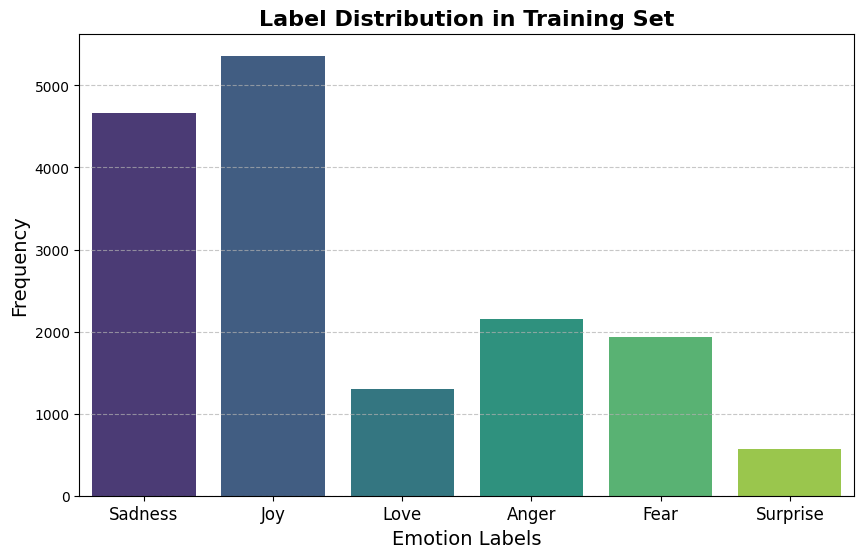

In [56]:
from collections import Counter
import seaborn as sns

##########################################################################################################################
# TODO: Analyze the distribution of labels in the training set. (visualize it in a perfect way)                          #
# Determine if there is any class imbalance.                                                                             #
##########################################################################################################################

# Count the occurrences of each label in the training set
label_counts = Counter(labels)

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")
plt.title('Label Distribution in Training Set', fontsize=16, fontweight='bold')
plt.xlabel('Emotion Labels', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(ticks=range(len(label_counts)), labels=[
    "Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [57]:
# Calculate and print label percentages
total_samples = sum(label_counts.values())
label_percentages = {label: (count / total_samples) * 100 for label, count in label_counts.items()}
print("Label Distribution (Percentages):")
for label, percentage in label_percentages.items():
    print(f"{label}: {percentage:.2f}%")


Label Distribution (Percentages):
0: 29.16%
3: 13.49%
2: 8.15%
5: 3.57%
4: 12.11%
1: 33.51%


In [58]:
# Compute class weights
class_weights = [1.0 / label_counts[i] for i in range(len(label_counts))]
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Print class weights
print(f"Class Weights: {class_weights}")


Class Weights: tensor([0.0002, 0.0002, 0.0008, 0.0005, 0.0005, 0.0017], device='cuda:0')


---

## Task 7: Creating the Model

Design and implement a recurrent neural network for the task. You may utilize a sequential architecture like RNN or GRU to enhance the model's performance.

Build and compile your model using Pytorch.

**Once the model is created, summarize its structure to verify the design.**

---

In [60]:
import torch.nn as nn

#########################################################################################################
# TODO:                                                                                                 #
# Create a recurrent neural network model for the task.                                                 #
# Implement a Bidirectional LSTM architecture with Attention and Pretrained Embeddings to enhance       #
# model performance. Once the model is created, summarize its structure to verify the design.           #
#########################################################################################################

class AttentionLayer(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Linear(hidden_dim * 2, 1)  # For bidirectional LSTM output

    def forward(self, lstm_outputs):
        # Compute attention scores
        attention_scores = torch.tanh(self.attention(lstm_outputs))
        attention_weights = torch.softmax(attention_scores, dim=1)

        # Apply attention weights to the LSTM outputs
        weighted_output = lstm_outputs * attention_weights
        return weighted_output.sum(dim=1)  # Summarize sequence dimension


class EmotionRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx, embedding_matrix):
        super(EmotionRNN, self).__init__()

        # Embedding layer with pretrained weights
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
        self.embedding.weight.data.copy_(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False  # Freeze the embedding layer

        # Bidirectional LSTM
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            bidirectional=True,
            batch_first=True
        )

        # Attention layer
        self.attention = AttentionLayer(hidden_dim)

        # Fully connected layer for classification
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Pass input through embedding layer
        embedded = self.embedding(x)

        # Pass through LSTM layer
        lstm_out, _ = self.lstm(embedded)

        # Apply attention mechanism
        weighted_output = self.attention(lstm_out)

        # Pass through fully connected layer
        output = self.fc(weighted_output)
        return output


# Hyperparameters
vocab_size = 10000  # Adjust based on tokenizer
embedding_dim = 200  # Match the dimensions of GloVe embeddings
hidden_dim = 64
output_dim = 6  # Six emotion classes
padding_idx = tokenizer_obj.word_index["<OOV>"]

# Load pretrained embeddings (e.g., GloVe)
import gensim.downloader as api

embedding_model = api.load("glove-twitter-200")  # Load GloVe embeddings with 200 dimensions

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer_obj.word_index.items():
    # Ensure the index is within the bounds of vocab_size
    if index < vocab_size:
        if word in embedding_model:
            embedding_matrix[index] = embedding_model[word]

# Initialize the model with pretrained embeddings and attention
model = EmotionRNN(vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx, embedding_matrix)
model.to(device)

# Print the model summary
print(model)

EmotionRNN(
  (embedding): Embedding(10000, 200, padding_idx=1)
  (lstm): LSTM(200, 64, batch_first=True, bidirectional=True)
  (attention): AttentionLayer(
    (attention): Linear(in_features=128, out_features=1, bias=True)
  )
  (fc): Linear(in_features=128, out_features=6, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


---

## Task 8: Training the Model

In this task, you will prepare a validation set and train your model using the training data.

1. Prepare the validation set by extracting tweets and labels, and convert them into sequences using the tokenizer.
2. Train the model on the training data.
3. Ensure that you implement **Early Stopping** to prevent overfitting and enhance efficiency.

Make sure to monitor the validation accuracy during training and adjust the parameters as necessary.

---

In [61]:
###############################################################################################################
# TODO: Extract the tweets and labels from the validation set. Convert the tweets into sequences using the    #
#       tokenizer defined earlier. Prepare the data for validation and ensure it matches the format of the    #
#       training set.                                                                                         #
###############################################################################################################

# Extract validation tweets and labels
val_tweets, val_labels = extract_tweets_labels(validation)

# Convert validation tweets into sequences
padded_val_sequences = get_sequences(tokenizer_obj, val_tweets, max_length)

# Convert validation labels to tensors
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long).to(device)

# Create validation DataLoader
val_dataset = TensorDataset(
    torch.tensor(padded_val_sequences, dtype=torch.long).to(device),
    val_labels_tensor
)
val_loader = DataLoader(val_dataset, batch_size=32)


In [62]:
###############################################################################################################
# TODO: Train the model on the prepared training data. Ensure you implement early stopping to monitor the     #
#       validation accuracy and prevent overfitting. Adjust the number of epochs or other hyperparameters as  #
#       needed to optimize model performance.                                                                 #
###############################################################################################################

from torch.utils.data import WeightedRandomSampler

# Calculate sampling weights for each class
class_sample_counts = Counter(labels)
sampling_weights = [1.0 / class_sample_counts[label] for label in labels]

# Create a sampler to oversample the minority class
sampler = WeightedRandomSampler(weights=sampling_weights, num_samples=len(labels), replacement=True)

# Use the sampler in the DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)


from sklearn.utils.class_weight import compute_class_weight

# Compute smoothed class weights
class_weights_np = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Convert to PyTorch tensor
class_weights = torch.tensor(class_weights_np, dtype=torch.float32).to(device)

# Update the loss function with the new class weights
loss_function = nn.CrossEntropyLoss(weight=class_weights)
print(f"Updated Class Weights: {class_weights}")

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize metric tracking
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
best_val_loss = float('inf')
patience = 15
early_stop_count = 0
epochs = 50

# Training loop with early stopping
for epoch in range(epochs):
    # Training phase
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        predictions = torch.argmax(F.softmax(outputs, dim=1), dim=1)
        correct_train += (predictions == targets).sum().item()
        total_train += targets.size(0)

    train_accuracy = correct_train / total_train
    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch in val_loader:
            inputs, targets = batch
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            total_val_loss += loss.item()

            # Calculate validation accuracy
            predictions = torch.argmax(F.softmax(outputs, dim=1), dim=1)
            correct_val += (predictions == targets).sum().item()
            total_val += targets.size(0)

    val_accuracy = correct_val / total_val
    val_losses.append(total_val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

    # Early stopping check
    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        early_stop_count = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        early_stop_count += 1
        if early_stop_count >= patience:
            print("Early stopping triggered!")
            break


Updated Class Weights: tensor([0.5715, 0.4973, 2.0450, 1.2351, 1.3767, 4.6620], device='cuda:0')
Epoch 1/50, Train Loss: 0.9247, Val Loss: 0.9823, Train Acc: 0.4318, Val Acc: 0.3325
Epoch 2/50, Train Loss: 0.3580, Val Loss: 0.5306, Train Acc: 0.7591, Val Acc: 0.7575
Epoch 3/50, Train Loss: 0.2260, Val Loss: 0.3713, Train Acc: 0.8681, Val Acc: 0.8370
Epoch 4/50, Train Loss: 0.1512, Val Loss: 0.3264, Train Acc: 0.9102, Val Acc: 0.8630
Epoch 5/50, Train Loss: 0.1319, Val Loss: 0.2711, Train Acc: 0.9225, Val Acc: 0.8940
Epoch 6/50, Train Loss: 0.1048, Val Loss: 0.2803, Train Acc: 0.9351, Val Acc: 0.8865
Epoch 7/50, Train Loss: 0.0885, Val Loss: 0.2721, Train Acc: 0.9439, Val Acc: 0.8995
Epoch 8/50, Train Loss: 0.0768, Val Loss: 0.2727, Train Acc: 0.9511, Val Acc: 0.9045
Epoch 9/50, Train Loss: 0.0680, Val Loss: 0.2650, Train Acc: 0.9557, Val Acc: 0.9075
Epoch 10/50, Train Loss: 0.0617, Val Loss: 0.2632, Train Acc: 0.9601, Val Acc: 0.9060
Epoch 11/50, Train Loss: 0.0506, Val Loss: 0.2854, T

---

## Task 9: Evaluating the Model

In this task, you will evaluate the performance of your model on the test set and visualize the training history. You will also analyze the model’s predictions on both individual and complete test samples.

### Steps:
1. Visualize the loss and accuracy over the training epochs.
2. Prepare and preprocess the test data using functions from Task 2.
3. Evaluate the model on the test set and examine individual predictions.
4. Analyze the overall predictions and display a confusion matrix.

---

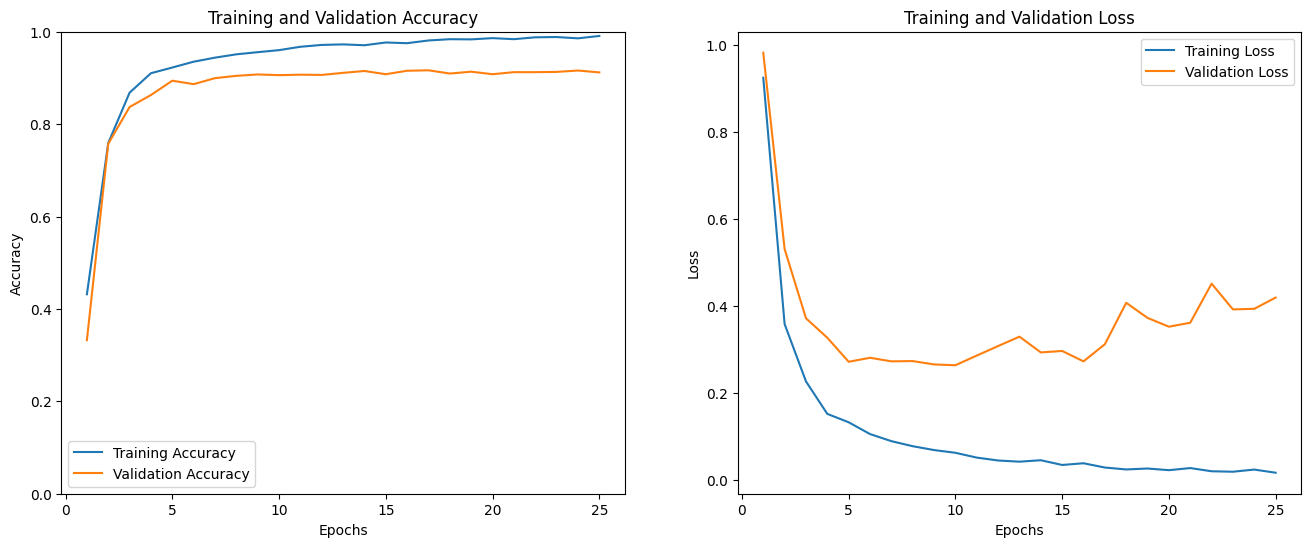

In [63]:
###############################################################################################################
# TODO: Visualize the training history by plotting the loss and accuracy over the epochs to assess model      #
#       performance. Use an appropriate visualization method to ensure clarity and effectiveness.             #
#       You can use the function implemented above for your visualizations.                                   #
###############################################################################################################

# Visualize the training history
plot_history({
    'loss': train_losses,          # Replace with your tracked training losses
    'val_loss': val_losses,        # Replace with your tracked validation losses
    'accuracy': train_accuracies,  # Replace with your tracked training accuracies
    'val_accuracy': val_accuracies # Replace with your tracked validation accuracies
})


In [64]:
###############################################################################################################
# TODO: Prepare the test set by extracting the tweets and labels, then convert the tweets into sequences using #
#       the tokenizer. Ensure the format matches that of the training and validation sets.                     #
###############################################################################################################

# Extract tweets and labels from the test set
test_tweets, test_labels = extract_tweets_labels(test)

# Convert test tweets into padded sequences
padded_test_sequences = get_sequences(tokenizer_obj, test_tweets, max_length)

# Convert test labels to tensors
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long).to(device)


In [65]:
###############################################################################################################
# TODO: Evaluate the model's performance on the test set. Print the accuracy and loss, and review individual   #
#       predictions to understand how the model is performing on unseen data.                                 #
###############################################################################################################

# Create a DataLoader for the test set
test_dataset = TensorDataset(
    torch.tensor(padded_test_sequences, dtype=torch.long).to(device),
    test_labels_tensor
)
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model
model.eval()
total_test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch

        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        total_test_loss += loss.item()

        # Calculate accuracy
        predictions = torch.argmax(F.softmax(outputs, dim=1), dim=1)
        correct += (predictions == targets).sum().item()
        total += targets.size(0)

test_accuracy = correct / total
print(f"Test Loss: {total_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 27.4758, Test Accuracy: 0.9145


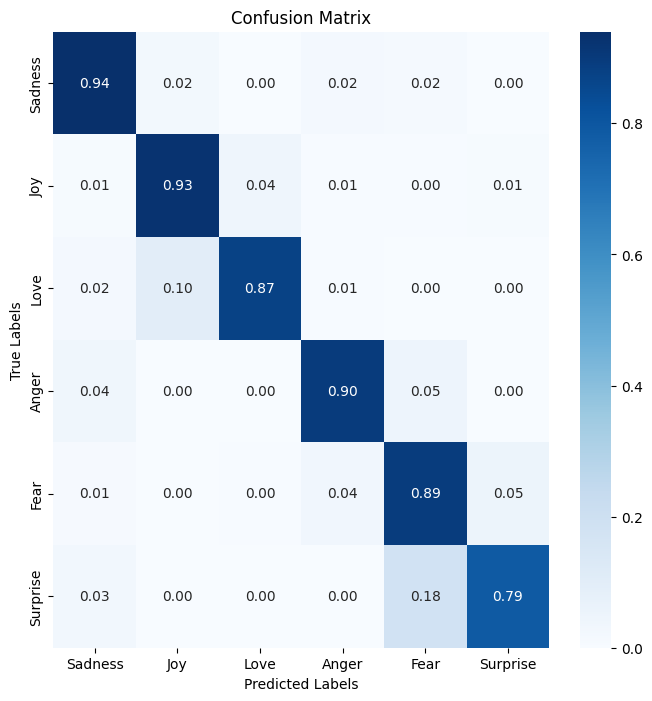

              precision    recall  f1-score   support

     Sadness       0.96      0.94      0.95       581
         Joy       0.96      0.93      0.94       695
        Love       0.81      0.87      0.84       159
       Anger       0.91      0.90      0.90       275
        Fear       0.84      0.89      0.86       224
    Surprise       0.72      0.79      0.75        66

    accuracy                           0.91      2000
   macro avg       0.87      0.89      0.88      2000
weighted avg       0.92      0.91      0.92      2000



In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

###############################################################################################################
# TODO: Generate predictions for all test samples and analyze the model's overall performance. Display the     #
#       confusion matrix to visualize the differences between true and predicted labels, helping to interpret  #
#       the model's classification results.                                                                   #
###############################################################################################################

# Generate predictions for the test set
all_predictions = []
all_targets = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = model(inputs)
        predictions = torch.argmax(F.softmax(outputs, dim=1), dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(all_targets, all_predictions, normalize='true')

# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[
    "Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"],
    yticklabels=["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"], cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import classification_report

# Generate predictions and evaluate class-wise metrics
print(classification_report(all_targets, all_predictions, target_names=[
    "Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"]))



# Final Analysis

After visualizing the confusion matrix based on your model’s predictions, analyze the results and provide insights into the model’s classification performance.

### **Question:**
<span style="font-size: 1.2em;">Which class seems to get confused with the class *love* the most?</span>

**Remember the class labels:**
- **0:** *Sadness*
- **1:** *Joy*
- **2:** *Love*
- **3:** *Anger*
- **4:** *Fear*
- **5:** *Surprise*

Reflect on the confusion matrix to answer this question and provide your reasoning for why this confusion might occur based on the emotional nature of the classes.


The confusion matrix reveals how the model classifies each emotion. For the **love** class, the class that seems to get confused with **love** the most is **joy** (class 1). This is evident as a significant number of samples labeled as **love** are classified as **joy**.

#### Why Does This Confusion Happen?
The emotional similarity between **love** and **joy** makes them challenging to distinguish:
1. **Emotional Overlap**:
   - **Love** often conveys positive sentiments and can overlap semantically with **joy**.
   - Words like "happiness," "bliss," and "adoration" might appear in both contexts, leading the model to confuse these classes.

2. **Dataset Representation**:
   - If the training dataset has insufficient distinctive samples for **love**, the model may rely on generic positive sentiment cues that are also indicative of **joy**.

3. **Feature Representation**:
   - The embedding space for text might cluster words associated with **love** and **joy** together, making it harder for the model to separate these classes.

#### Possible Remedies
To reduce this confusion:
1. **Augment Data for Love Class**:
   - Add more examples of tweets specifically labeled as **love** to help the model learn distinct patterns.

2. **Feature Engineering**:
   - Introduce additional features (e.g., intensity scores, hashtags) to differentiate emotions.

3. **Contrastive Learning**:
   - Apply techniques like **contrastive loss** during training to explicitly separate embeddings of **love** and **joy** in the feature space.

# **Best regards.**